K-Means là thuật toán rất quan trọng và được sử dụng phổ biến trong kỹ thuật phân cụm. Tư tưởng chính của thuật toán K-Means là tìm cách phân nhóm các đối tượng (objects) đã cho vào K cụm (K là số các cụm được xác đinh trước, K nguyên dương) sao cho tổng bình phương khoảng cách giữa các đối tượng đến tâm nhóm (centroid) là nhỏ nhất.

Các bước thực hiện thuật toán K-Means
1. Chọn ngẫu nhiên K tâm (centroid) cho K cụm (cluster). Mỗi cụm được đại diện bằng các tâm của cụm.
2. Tính khoảng cách giữa các đối tượng (objects) đến K tâm (thường dùng khoảng cách Euclidean)
3. Nhóm các đối tượng vào nhóm gần nhất
4. Xác định lại tâm mới cho các nhóm
5. Thực hiện lại bước 2 cho đến khi không có sự thay đổi nhóm nào của các đối tượng

**Step 1: Import các modules thư viện**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**Step 2: Tạo DataFrame**

Chúng ta sẽ tạo một DataFrame chứa ba biến sau cho 20 cầu thủ bóng rổ khác nhau:
- points
- assists
- rebounds

In [2]:
#create DataFrame
df = pd.DataFrame({'points': [18, np.nan, 19, 14, 14, 11, 20, 28, 30, 31,
                              35, 33, 29, 25, 25, 27, 29, 30, 19, 23],
                   'assists': [3, 3, 4, 5, 4, 7, 8, 7, 6, 9, 12, 14,
                               np.nan, 9, 4, 3, 4, 12, 15, 11],
                   'rebounds': [15, 14, 14, 10, 8, 14, 13, 9, 5, 4,
                                11, 6, 5, 5, 3, 8, 12, 7, 6, 5]})

#view first five rows of DataFrame
print(df.head())

   points  assists  rebounds
0    18.0      3.0        15
1     NaN      3.0        14
2    19.0      4.0        14
3    14.0      5.0        10
4    14.0      4.0         8


**Step 3: Làm sạch và tiền xử lý dữ liệu**


In [3]:
#drop rows with NA values in any columns
df = df.dropna()
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(df)
#view first five rows of scaled DataFrame
print(scaled_df[:5])

[[-0.86660275 -1.22683918  1.72722524]
 [-0.72081911 -0.96077767  1.45687694]
 [-1.44973731 -0.69471616  0.37548375]
 [-1.44973731 -0.96077767 -0.16521285]
 [-1.88708823 -0.16259314  1.45687694]]


**Step 4: Lựa chọn cụm tối ưu**

In [4]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

Biểu diễn dữ liệu

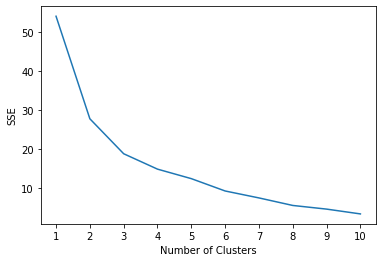

In [5]:
#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

**Step 5: Thực hiện phân cụm K-Means với K tối ưu**

In [10]:
# instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

# fit k-means algorithm to data
kmeans.fit(scaled_df)

# view cluster assignments for each observation
print(kmeans.labels_) 

# append cluster assignments to original DataFrame
df['cluster'] = kmeans.labels_

# view updated DataFrame
print(df)

[1 1 1 1 1 1 2 2 0 0 0 0 2 2 2 0 0 0]
    points  assists  rebounds  cluster
0     18.0      3.0        15        1
2     19.0      4.0        14        1
3     14.0      5.0        10        1
4     14.0      4.0         8        1
5     11.0      7.0        14        1
6     20.0      8.0        13        1
7     28.0      7.0         9        2
8     30.0      6.0         5        2
9     31.0      9.0         4        0
10    35.0     12.0        11        0
11    33.0     14.0         6        0
13    25.0      9.0         5        0
14    25.0      4.0         3        2
15    27.0      3.0         8        2
16    29.0      4.0        12        2
17    30.0     12.0         7        0
18    19.0     15.0         6        0
19    23.0     11.0         5        0


**Yêu cầu:**
- Vẽ biểu đồ biểu diễn kết quả phân cụm cho thuật toán trên
- Thực hiện lựa chọn và phân cụm K-Means cho các tập dữ liệu bên dưới. Cho biết K nào tốt nhất tương ứng với từng tập dữ liệu. Vẽ biểu đồ phân cụm kết quả.

**Vẽ biểu đồ biểu diễn kết quả phân cụm cho thuật toán trên**

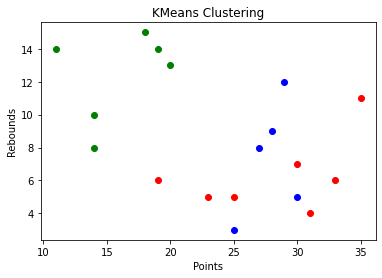

In [13]:
# assign colors to each cluster label
colors = ['r', 'g', 'b']

# create scatter plot
for i in range(len(colors)):
    x = df[df['cluster'] == i]['points']
    y = df[df['cluster'] == i]['rebounds']
    plt.scatter(x, y, c=colors[i])

# set plot title and axis labels
plt.title('KMeans Clustering')
plt.xlabel('Points')
plt.ylabel('Rebounds')

# show plot
plt.show()

**Thực hiện lựa chọn và phân cụm K-Means cho các tập dữ liệu bên dưới. Cho biết K nào tốt nhất tương ứng với từng tập dữ liệu. Vẽ biểu đồ phân cụm kết quả.**

In [20]:
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

In [16]:
# load Iris dataset
iris = load_iris()
X = iris.data

In [17]:
# standardize data
X_std = StandardScaler().fit_transform(X)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

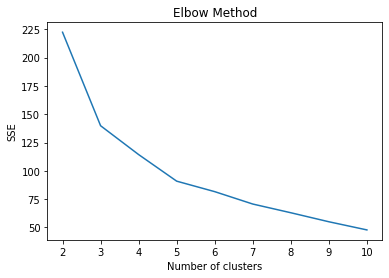

In [18]:
# elbow method to find optimal number of clusters
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)
plt.plot(range(2, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [21]:
# fit k-means algorithm to data with chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_std)

# compute silhouette score for clustering with chosen number of clusters
silhouette_avg = silhouette_score(X_std, kmeans.labels_)
print('Silhouette Score:', silhouette_avg)

# plot clusters
plt.scatter


Silhouette Score: 0.45994823920518635


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>